# Setup

In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Building an Image Classifier

Importing TensorFlow and Keras.

In [2]:
from tensorflow import keras

Loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already splitted  between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

Spliting the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Plotting an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

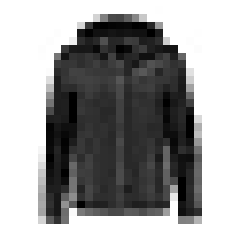

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [10]:
y_train[0]

4

In [11]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

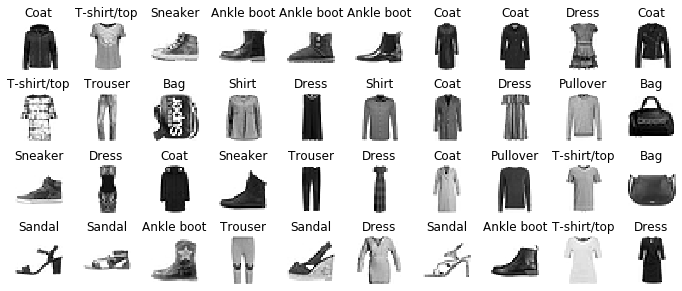

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

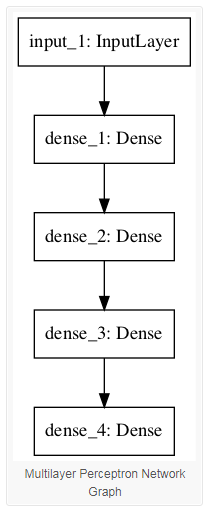

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
keras.backend.clear_session()
tf.random.set_random_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.layers

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
model.get_layer(hidden1.name) is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()

In [23]:
weights

array([[ 0.01513953, -0.00182861,  0.0646853 , ...,  0.04114765,
         0.00448342,  0.06432123],
       [ 0.07068136, -0.07170715,  0.02270165, ..., -0.00219323,
        -0.06530555,  0.05230799],
       [ 0.00088049, -0.04335928,  0.02484499, ..., -0.0181252 ,
        -0.04382037,  0.00582965],
       ...,
       [ 0.06951119, -0.04154188, -0.0631083 , ..., -0.06399027,
         0.05743755, -0.02660926],
       [ 0.04145878, -0.05679043, -0.02418258, ...,  0.06427447,
         0.04248022, -0.00580377],
       [-0.02178467, -0.01062121,  0.011522  , ..., -0.01790331,
         0.02122946, -0.06212726]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [28]:
history = model.fit(X_train, y_train, epochs=7,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/7
55000/55000 [==============================] - 17s 304us/sample - loss: 0.7362 - acc: 0.7568 - val_loss: 0.5159 - val_acc: 0.8344
Epoch 2/7
55000/55000 [==============================] - 17s 315us/sample - loss: 0.4916 - acc: 0.8305 - val_loss: 0.4481 - val_acc: 0.8490
Epoch 3/7
55000/55000 [==============================] - 17s 312us/sample - loss: 0.4446 - acc: 0.8454 - val_loss: 0.4383 - val_acc: 0.8502
Epoch 4/7
55000/55000 [==============================] - 18s 323us/sample - loss: 0.4175 - acc: 0.8533 - val_loss: 0.3999 - val_acc: 0.8654
Epoch 5/7
55000/55000 [==============================] - 17s 313us/sample - loss: 0.3957 - acc: 0.8599 - val_loss: 0.3852 - val_acc: 0.8632
Epoch 6/7
55000/55000 [==============================] - 18s 325us/sample - loss: 0.3810 - acc: 0.8637 - val_loss: 0.3809 - val_acc: 0.8658
Epoch 7/7
55000/55000 [==============================] - 12s 219us/sample - loss: 0.3663 - acc: 0.8697 - val_lo

In [29]:
history.params

{'batch_size': 32,
 'epochs': 7,
 'steps': None,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [30]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6]


In [31]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

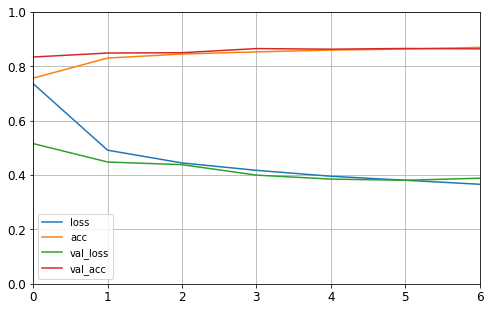

In [32]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - ETA: 0s - loss: 0.4246 - acc: 0.849 - 1s 90us/sample - loss: 0.4233 - acc: 0.8502


[0.423250289440155, 0.8502]

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.37, 0.  , 0.59],
       [0.  , 0.  , 0.95, 0.  , 0.03, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)